<a href="https://colab.research.google.com/github/PonsRullan/Bartolome/blob/main/MLTomeu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final de asignatura

Bartolome Pons Rullan


El objetivo de la prática consiste en clasificar y evaluar diferentes 
algoritmos de clasificación de ML.
Los datos son imágenes de escasa resolución de objetos reales 
(por ejemplo: un oso, un avión, un tren, etc.) que pertenecen a una categoría
(p.ej. mamíferos, vehículos, etc.). Los datos están separados en tres ficheros:
- fichero *meta*: dispone de información descriptiva de las etiquetas usadas
- fichero *train*: los datos de entreno
- fichero *test*: los datos para la evaluación.
Estos tres ficheros se proporcionan en formato binario por su elevado tamaño.

Se pide:
- 1. Analiza con mayor detalle la dimensionalidad de los datos. Contesta a: 
    ¿cuántos MB ocuparían los ficheros **train** y **test** si las imágenes 
    que contienen estuvieran en formato jpg?
- 2. Selecciona datos para entrenar un modelo de clasificación usando la 
    librería sklearn con tan solo las entidades de tres categorías elegidas al azar por el sistema.
- 3. Aplica, configura y analiza los resultados tras aplicar los siguientes 
    algoritmos de clasificación sobre los datos seleccionados previamente:
  - Support Vector Machine
  - Random Forest Classifier
  - K Neighbors Classifier
- 4. Compara los resultados de los tres algoritmos.


Created on Mon Feb 13 15:01:14 2023

In [42]:
%pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
dbus-

#Vamos a cargar los paquetes que necesitaremos en el codigo

In [43]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample
import statistics as stat 
from statistics import mode
import os
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

Función para carga de datos. Formato binario propio de pandas: pickle

In [44]:
def unpickle(file):
    with open(file, 'rb') as f:     
        data = pickle.load(f, encoding='bytes') 
    return data

Fichero META: descripcion de la base de datos

In [45]:
dataMeta = unpickle("meta")
print(dataMeta.keys())

dict_keys([b'fine_label_names', b'coarse_label_names'])


Tipos de entidades

In [46]:
print(len(dataMeta[b'fine_label_names']))
print(dataMeta[b'fine_label_names'])

100
[b'apple', b'aquarium_fish', b'baby', b'bear', b'beaver', b'bed', b'bee', b'beetle', b'bicycle', b'bottle', b'bowl', b'boy', b'bridge', b'bus', b'butterfly', b'camel', b'can', b'castle', b'caterpillar', b'cattle', b'chair', b'chimpanzee', b'clock', b'cloud', b'cockroach', b'couch', b'crab', b'crocodile', b'cup', b'dinosaur', b'dolphin', b'elephant', b'flatfish', b'forest', b'fox', b'girl', b'hamster', b'house', b'kangaroo', b'keyboard', b'lamp', b'lawn_mower', b'leopard', b'lion', b'lizard', b'lobster', b'man', b'maple_tree', b'motorcycle', b'mountain', b'mouse', b'mushroom', b'oak_tree', b'orange', b'orchid', b'otter', b'palm_tree', b'pear', b'pickup_truck', b'pine_tree', b'plain', b'plate', b'poppy', b'porcupine', b'possum', b'rabbit', b'raccoon', b'ray', b'road', b'rocket', b'rose', b'sea', b'seal', b'shark', b'shrew', b'skunk', b'skyscraper', b'snail', b'snake', b'spider', b'squirrel', b'streetcar', b'sunflower', b'sweet_pepper', b'table', b'tank', b'telephone', b'television', 

y sus categorías

In [47]:
print(len(dataMeta[b'coarse_label_names']))
print(dataMeta[b'coarse_label_names'])

20
[b'aquatic_mammals', b'fish', b'flowers', b'food_containers', b'fruit_and_vegetables', b'household_electrical_devices', b'household_furniture', b'insects', b'large_carnivores', b'large_man-made_outdoor_things', b'large_natural_outdoor_scenes', b'large_omnivores_and_herbivores', b'medium_mammals', b'non-insect_invertebrates', b'people', b'reptiles', b'small_mammals', b'trees', b'vehicles_1', b'vehicles_2']


Fichero TRAIN

In [48]:
datatrain = unpickle("train")

print(datatrain.keys())
print(len(datatrain[b'filenames']))

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
50000


vamos a hacer subarrays de datatrain y datatest por partes del diccionario: pixels (dtrain), etiquetas con detalle (dtrainflabels), categorias (dtrainclabels), el resto los dejamos de momento en paz

In [49]:
dtrain=datatrain[b'data']
dtrainflabels=datatrain[b'fine_labels']
dtrainclabels=datatrain[b'coarse_labels']
print(dtrain.shape)

(50000, 3072)


Cada entidad, se encuentra en una posición de cada uno de los anteriores atributos
Vamos a ver la entidad '0'

In [50]:
print(len(dtrain[0]))

3072


Los datos de cada entidad contienen los valores de la imagen en dtrain y dtest. La imagen se obtiene por la combinación de tres canales/capas (red, green, blue) de la siguiente forma:

In [51]:
ch0 = dtrain[0][0:1024]
ch1 = dtrain[0][1024:2048]
ch2 = dtrain[0][2048:]

Cada canal es una capa del correspondiente color

In [52]:
ch0 = np.reshape(ch0, (32,32)) # red
ch1 = np.reshape(ch1, (32,32)) # green
ch2 = np.reshape(ch2, (32,32)) # blue

La combinación de ellas da una imagen con los tres colores:

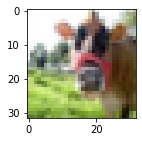

In [53]:
image = np.dstack((ch0, ch1, ch2))

fig, ax = plt.subplots(figsize=(2, 2))

ax.imshow(image)

plt.show()

La etiqueta y categoría de la entidad '0' están codificados en 
los atributos:

In [54]:
code_fine_label = dtrainflabels[0]
code_coarse_label = dtrainclabels[0]
print(code_fine_label)
print(code_coarse_label)

19
11


Necesitamos la información del fichero META para poner nombre al código de la etiqueta

In [55]:
print(dataMeta[b'fine_label_names'][code_fine_label])
print(dataMeta[b'coarse_label_names'][code_coarse_label])

b'cattle'
b'large_omnivores_and_herbivores'


Añadimos su titulo a partir de su etiqueta, le quitamos los indicadores de los pixels y guardamos en formato .jpg

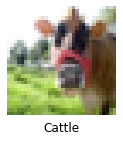

In [56]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.imshow(image)

ax.set_title(dataMeta[b'fine_label_names'][code_fine_label].decode("utf-8").capitalize(),y=-.2)

plt.axis('off')

plt.savefig('cattle.jpg',dpi=32)

plt.show()

Fichero TEST: como en TRAIN, tambien sacamos del diccionario una tabla (numeros o valores del color) y dos listas (categorias y etiquetas): 10.000 o 1/6 del total.

In [57]:
datatest = unpickle("test")

print(datatest.keys())
dtest=datatest[b'data']
dtestflabels=datatest[b'fine_labels']
dtestclabels=datatest[b'coarse_labels']
print(dtest.shape)

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
(10000, 3072)


variable clasificadora: coase_labels

In [58]:
print(dtrainclabels[1])

15


por ejemplo: la 2ª variable tiene categoria 15

In [59]:
print(dtrainclabels[1])

15


por ejemplo: la 2ª variable tiene categoria 15

veamos como son los valores centrales del conjunto de entrenamiento. Media será de los valores de las celdas de la key 'data', es decir, 1/3 del color de cada pixel de la entidad (32x32), pero eso es solo un valor, no lo que ocupa


In [60]:
print('datos del conjunto de entrenamiento')
media=np.mean(dtrain)
print('media = ',round(media))
mediana=np.median(dtrain)
print('mediana = ',round(mediana))
desv=np.std(dtrain)
print('desviacion_tipica =',round(desv))
minimo=np.min(dtrain)
maximo=np.max(dtrain)
print('rango entre ',minimo, 'y' ,maximo)

datos del conjunto de entrenamiento
media =  122
mediana =  116
desviacion_tipica = 68
rango entre  0 y 255


para utilizar Pandas, se requiere formato data frame de los datos de los pixels, pero tambien lo haremos de la columna de categorias, pues mas adelante los juntaremos

In [61]:
dftrain=pd.DataFrame(dtrain)
dftrainclabels=pd.DataFrame(dtrainclabels)

Numero de fotos del train

In [62]:
numfotos=len(dftrain)
print('numero de fotos en train= ',numfotos)

numero de fotos en train=  50000


tamaño del train en Bytes

In [63]:
pesofotos=os.stat('train').st_size 
print('peso de las fotos en Bytes= ',pesofotos)

peso de las fotos en Bytes=  155249918


lo mismo en MB : 148 MB

In [64]:
mbfotos=pesofotos/(1024*1024)
print('MB ocupados = ',round(mbfotos,0))

MB ocupados =  148.0


veamos ahora lo que pesaria si las fotos estuvieran en formato JPG: sabemos que pesa una foto promedio en bytes (dividido por 1024 en kB y otra vez por 1024 en MB)

In [65]:
pesofoto=os.stat('cattle.jpg').st_size/(1024^2)
print('peso de cattle= ',round(pesofoto,2),'MB')

peso de cattle=  1.46 MB


promedio del peso de una foto x numero de fotos del train

In [66]:
pesotrain=pesofoto*len(dtrain)

una entidad ocupa en el orden de 3kB, pero en formato JPG, unos 1.460 kB: la diferencia es de casi 500 veces. Pasamos de 148 MB a 74 TB, y eso limitando la definicion a 32x32 pixels.

In [67]:
diferenciaMB=pesotrain-mbfotos
print(round(diferenciaMB,0),'MB')

73098.0 MB


copio lo anterior y repito lo mismo: cambio train por test, aunque bastaria que dividiera por 5 el numero de fotos y por tanto los tamaños comparados del test

In [68]:
print('datos del conjunto de prueba')

mediat=np.mean(dtest)
print('media = ',round(mediat))
medianat=np.median(dtest)
print('mediana = ',round(medianat))
desvt=np.std(dtest)
print('desviacion_tipica',round(desvt))
minimot=np.min(dtest)
maximot=np.max(dtest)
print('rango entre ',minimot, 'y' ,maximot)

dftest=pd.DataFrame(dtest)
dftestclabels=pd.DataFrame(dtestclabels)

datos del conjunto de prueba
media =  122
mediana =  117
desviacion_tipica 69
rango entre  0 y 255


Numero de fotos del Test

In [69]:
numfotost=len(dftest)
print('numero de fotos en test= ',numfotost)

numero de fotos en test=  10000


tamaño del Test en Bytes

In [70]:
pesofotost=os.stat('test').st_size

lo mismo en MB (¡solo 30 MB!)

In [71]:
mbfotostest=pesofotost/(1024*1024)
print('MB ocupados = ',round(mbfotostest,0))

MB ocupados =  30.0


sabemos así lo que ocupa el fichero en su conjunto. Ahora veamos una foto promedio para multiplicarla por el numero de fotos del test y pasarla despues a MB

In [72]:
pesofotot=os.stat('cattle.jpg').st_size/(1024^2)
print(round(pesofotot,2),'MB')

1.46 MB


promedio del peso de una foto x numero de fotos del train

In [73]:
pesotest=pesofotot*len(dtest)

la diferencia si contuvieran JPG:

In [74]:
diferenciaMBt=pesotest-mbfotostest
print(round(diferenciaMBt,0),'MB')

14620.0 MB


3 categorias elegidas al azar

In [75]:
random.seed(0)
cat3=sample(dtrainclabels,3)
print(dataMeta[b'coarse_label_names'][cat3[0]],'foto',cat3[0])
print(dataMeta[b'coarse_label_names'][cat3[1]],'foto',cat3[1])
print(dataMeta[b'coarse_label_names'][cat3[2]],'foto',cat3[2])

b'large_man-made_outdoor_things' foto 9
b'reptiles' foto 15
b'small_mammals' foto 16


probamos con las mismas entidades

utilizamos el mismo set de datos de train dftrain y dftrainclabels 
que corresponden a los mismos dtrain y dtrainclabels, pero
acondicionados para usar con dataframes de Pandas

creamos un data frame de las entidades que estan en las categorias elegidas y visualizamos los primeros 10 valores para chekear que incluyen las 3 categorias


In [76]:
trainclabelsbol=dftrainclabels.isin(cat3)==True
train3=dftrainclabels[trainclabelsbol].dropna().astype(int)
print(train3[0:9])

     0
1   15
13   9
18  16
20  16
31   9
33  16
40  15
45   9
49  15


lo mismo con las de prueba

In [77]:
testclabelsbol=dftestclabels.isin(cat3)==True
test3=dftestclabels[testclabelsbol].dropna().astype(int)
print(test3[0:9])

     0
23  15
33  15
39   9
49   9
61  15
63  16
81  15
84  15
86  15


construiremos la tabla del subset de 7500 entidades de las 3 categorias: juntando las coarse labels con los datos de las entidades y quitando la ultima columna

In [78]:
XX_train=pd.concat([dftrain,train3], axis=1, join="inner")
X_train=XX_train.iloc[: , :-1]
print(X_train[0:9])
print(X_train.shape)
y_train = train3[0]
print(y_train.shape)

    0     1     2     3     4     5     6     7     8     9     ...  3062  \
1    255   253   253   253   253   253   253   253   253   253  ...   253   
13   253   251   252   252   252   252   252   251   251   251  ...   139   
18    71    46    74    80    86    93    78    93    89    84  ...   105   
20   156   151   158   155   157   158   154   158   163   158  ...   147   
31   252   251   252   252   251   252   252   252   252   252  ...    50   
33    30    21    30    38    49    50    35    30    31    26  ...    99   
40    48    57    52    37    36    35    51    49    51    56  ...   204   
45    58    64    70    70    68    66    65    65    68    70  ...    20   
49     3    45    59    37    37    51    43    48    68    54  ...   160   

    3063  3064  3065  3066  3067  3068  3069  3070  3071  
1    253   253   253   253   253   253   253   253   255  
13   142   140   141   141   139   139   139   137   133  
18    84    66    67    76    89    77    89    82  

asi tenemos los datos donde aplicar los métodos Machine Learning al sample

Ahora vamos a crear los entornos de prueba

In [79]:
XX_test=pd.concat([dftest,test3], axis=1, join="inner")
X_test=XX_test.iloc[: , :-1]
print(X_test[0:9])
print(X_test.shape)
y_test = test3[0]
print(y_test.shape)

    0     1     2     3     4     5     6     7     8     9     ...  3062  \
23    66    68    71    73    76    79    84    90    93   102  ...    48   
33    19    19    18    16    16    17    18    18    18    18  ...    21   
39   162   130   162   119   103   193   244   242   246   246  ...    46   
49    85    93   105   112   143   177   148   135   138   145  ...    65   
61    67    73    71    73    77    89    99    86    85    94  ...    44   
63    74    90    81    64    76    79    42    91   131    95  ...    68   
81   174   173   174   176   183   193   204   212   216   217  ...   149   
84     1     1     1     1     1     1     1     1     1     1  ...     1   
86   188   188   191   192   194   195   196   198   200   202  ...   247   

    3063  3064  3065  3066  3067  3068  3069  3070  3071  
23    48    45    42    39    39    41    39    35    32  
33    19    19    20    22    19    18    18    18    18  
39    91    79    83   109   125   137   145   151  

Support Vector Machine: datos linealmente separables por un hiperplano


entrenamos

In [80]:
svmclass = svm.SVC(C = 100, kernel = 'linear', random_state=123)
svmclass.fit(X_train,y_train)

SVC(C=100, kernel='linear', random_state=123)

predecimos con datos de test

In [81]:
predsvm=svmclass.predict(X_test)

matriz de confusion (correctamente clasificados, falsos+, falsos-)


In [ ]:
cmsvm=confusion_matrix(y_test,predsvm)
print(cmsvm)

report estandar de SVMreport estandar de SVM

In [83]:
svmacc=metrics.accuracy_score(y_test,predsvm)
svmreport=classification_report(y_test,predsvm)
print(svmreport)
print('Correctamente Clasificados:',round(svmacc,1))

              precision    recall  f1-score   support

           9       0.59      0.74      0.66       500
          15       0.44      0.39      0.41       500
          16       0.50      0.43      0.46       500

    accuracy                           0.52      1500
   macro avg       0.51      0.52      0.51      1500
weighted avg       0.51      0.52      0.51      1500

Correctamente Clasificados: 0.5


Random Forest

entrenamos:

In [84]:
rfclass=RandomForestClassifier(random_state=0)
rfclass.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

predecimos:

In [ ]:
predrf=rfclass.predict(X_test)

matriz de confusion

In [ ]:
cmrf=confusion_matrix(y_test,predrf)
print(cmrf)

report estandar de RF

In [ ]:
rfacc=metrics.accuracy_score(y_test,predrf)
rfreport=classification_report(y_test,predrf)
print(rfreport)
print('Correctamente Clasificados:',round(rfacc,1))

K Neighbors Classifier

Debemos elegir un numero de vecinos para ver cual es el mejor (entre 1 y 10) 


Probamos con todos los valores y entre el 7 y el 9 se obtienen los mejores resultados

entrenamos:

In [88]:
k=9

nbclass=KNeighborsClassifier(n_neighbors=k) 
nbclass.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

predecimos

In [89]:
prednc=nbclass.predict(X_test)

matriz de confusion

In [90]:
cmnb=confusion_matrix(y_test,prednc)
print(cmnb)

[[397  60  43]
 [ 38 298 164]
 [ 27 225 248]]


report estandar de NC

In [91]:
ncacc=metrics.accuracy_score(y_test,prednc)
ncreport=classification_report(y_test,prednc)
print(ncreport)
print('Correctamente Clasificados:',round(ncacc,1))

              precision    recall  f1-score   support

           9       0.86      0.79      0.83       500
          15       0.51      0.60      0.55       500
          16       0.55      0.50      0.52       500

    accuracy                           0.63      1500
   macro avg       0.64      0.63      0.63      1500
weighted avg       0.64      0.63      0.63      1500

Correctamente Clasificados: 0.6


compararemos los 3 métodos por %correctamente clasificados, falsos+ y falsos-



In [92]:
print('                          Vector Machines','Random Forest','K Neighbors' )
print('Correctamente clasificados','    ',round(svmacc,2),'        ',round(rfacc,2),'        ',round(ncacc,2))


                          Vector Machines Random Forest K Neighbors
Correctamente clasificados      0.52          0.69          0.63
                          Vector Machines Random Forest K Neighbors
Correctamente clasificados      0.52          0.69          0.63
